In [1]:
import numpy as np
import matplotlib.pyplot as plt

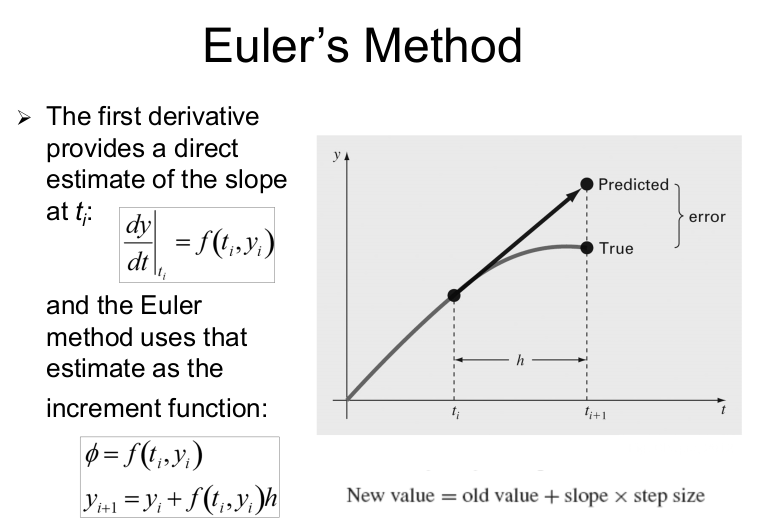$\newcommand{\diff}{\text{d}}
\newcommand{\dydx}[2]{\frac{\text{d}#1}{\text{d}#2}}
\newcommand{\ddydx}[2]{\frac{\text{d}^2#1}{\text{d}#2^2}}
\newcommand{\pypx}[2]{\frac{\partial#1}{\partial#2}}
\newcommand{\unit}[1]{\,\text{#1}}$

## Example
$y'=4e^{0.8t}-0.5y, \;y(t=0)=2$, calculate $y$ for $t\in[0,4]$ with a step size of $h=1$

Analytical solution: $$y=\frac{4}{1.3}\left(e^{0.8t} - e^{-0.5t}\right)+2e^{-0.5t}$$

In [2]:
def yp(t,y):
    # The given y'(t,y) equation
    return 4*np.exp(0.8*t)-0.5*y

Let's show that the given analytical solution is indeed the solution. We calculate the left side ($y'$) of the equation using the differentiation of the analytical solution and right side of the equation by directly plugging in the given analytical solution and compare with each other for various $t$ values.

In [3]:
def dy(t):
    # y' from the analytical solution
    return 4/1.3*(0.8*np.exp(0.8*t)+0.5*np.exp(-0.5*t))-np.exp(-0.5*t)

In [4]:
def y_t(t):
    # true y function (analytical solution)
    return 4/1.3*(np.exp(0.8*t)-np.exp(-0.5*t))+2*np.exp(-0.5*t)

In [5]:
t = np.arange(0,10,0.5)
yp1 = dy(t)
yp2 = 4*np.exp(0.8*t)-0.5*y_t(t)
for tt,i,j in zip(t,yp1,yp2):
    print("{:.1f}: {:10.4f}, {:10.4f}".format(tt,i,j))

0.0:     3.0000,     3.0000
0.5:     4.0915,     4.0915
1.0:     5.8048,     5.8048
1.5:     8.4269,     8.4269
2.0:    12.3902,    12.3902
2.5:    18.3427,    18.3427
3.0:    27.2541,    27.2541
3.5:    40.5727,    40.5727
4.0:    60.4606,    60.4606
4.5:    90.1447,    90.1447
5.0:   134.4396,   134.4396
5.5:   200.5289,   200.5289
6.0:   299.1294,   299.1294
6.5:   446.2295,   446.2295
7.0:   665.6813,   665.6813
7.5:   993.0682,   993.0682
8.0:  1481.4746,  1481.4746
8.5:  2210.0933,  2210.0933
9.0:  3297.0663,  3297.0663
9.5:  4918.6407,  4918.6407


It is even easier to see that the given analytic solution is indeed the solution via plotting both sides of the equation together:

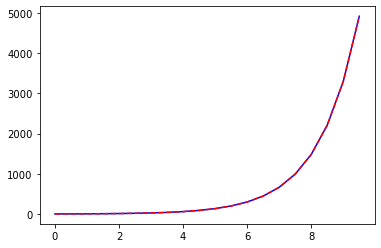

In [6]:
plt.plot(t,yp1,"b",t,yp2,"--r")
plt.show()

**Solving the ODE using Euler Method:**

In [7]:
t = np.arange(1,5)
y = [2]

print("{:>2s}\t{:>8s}\t{:^8s}\t{:>5s}"\
      .format("t","y_Euler","y_true","Err%"))

print("{:>2d}\t{:8.5f}\t{:8.5f}\t{:5.2f}%"\
      .format(0,y[0],y_t(0),np.abs(y_t(0)-y[0])/y_t(0)*100))
for i in t:
    slope = yp(i-1,y[i-1])
    y.append(y[i-1]+slope*1)
    print("{:>2d}\t{:8.5f}\t{:8.5f}\t{:5.2f}%"\
      .format(i,y[i],y_t(i),np.abs(y_t(i)-y[i])/y_t(i)*100))

 t	 y_Euler	 y_true 	 Err%
 0	 2.00000	 2.00000	 0.00%
 1	 5.00000	 6.19463	19.28%
 2	11.40216	14.84392	23.19%
 3	25.51321	33.67717	24.24%
 4	56.84931	75.33896	24.54%


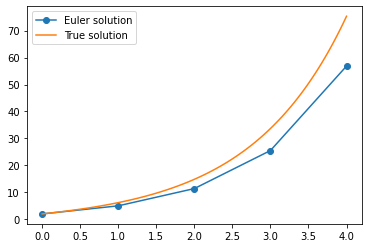

In [8]:
plt.plot(range(5),y,"-o",\
         np.linspace(0,4,100),y_t(np.linspace(0,4,100)),"-")
plt.legend(["Euler solution","True solution"])
plt.show()

# Runge-Kutta Method
**(RK4)**

$$y_{i+1} = y_i+\frac{1}{6}\left(k_1+2k_2+2k_3+k_4\right)h$$

where:
$$k_1 = f(t_i,y_i)\\
k_2= f(t_i+\tfrac{1}{2}h,y_i+\tfrac{1}{2}k_1 h)\\
k_3= f(t_i+\tfrac{1}{2}h,y_i+\tfrac{1}{2}k_2 h)\\
k_4 = f(t_i+h,y_i+k_3 h)$$


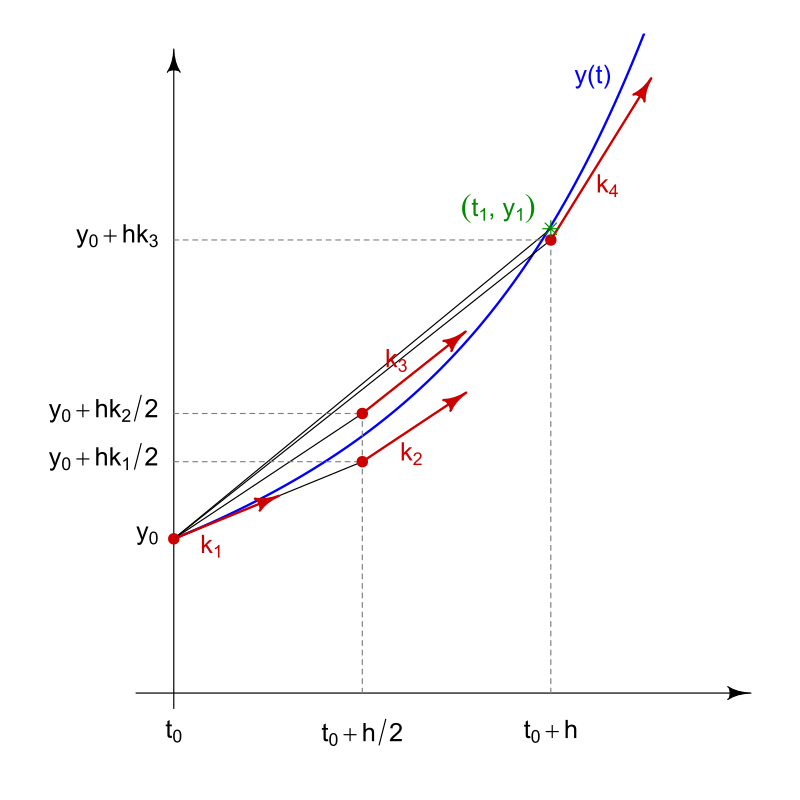
[Image: Wikipedia](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#/media/File:Runge-Kutta_slopes.svg)

## Example
$y'=4e^{0.8t}-0.5y$, $y(t=0)=2$, calculate $y$ for $t\in[0,4]$ with a step size of $h=1$

Analytical solution: $$y=\frac{4}{1.3}\left(e^{0.8t} - e^{-0.5t}\right)+2e^{-0.5t}$$

In [9]:
def f(t,y):
    return 4*np.exp(0.8*t) - 0.5*y

In [10]:
y = [2]
t = np.arange(5)
h = t[1]-t[0]
print("{:>2s}\t{:>8s}\t{:^8s}\t{:>5s}"\
      .format("t","y_KR4","y_true","Err%"))
for i in range(1,5):
    k1 = f(t[i-1],y[i-1])
    k2 = f(t[i-1]+0.5*h,y[i-1]+0.5*k1*h)
    k3 = f(t[i-1]+0.5*h,y[i-1]+0.5*k2*h)
    k4 = f(t[i-1]+h,y[i-1]+k3*h)
    y.append(y[i-1]+(k1+2*k2+2*k3+k4)*h/6)

for i in range(len(y)):
    print("{:>2d}\t{:8.5f}\t{:8.5f}\t{:5.2f}%"\
      .format(i,y[i],y_t(i),np.abs(y_t(i)-y[i])/y_t(i)*100))

 t	   y_KR4	 y_true 	 Err%
 0	 2.00000	 2.00000	 0.00%
 1	 6.20104	 6.19463	 0.10%
 2	14.86248	14.84392	 0.13%
 3	33.72135	33.67717	 0.13%
 4	75.43917	75.33896	 0.13%


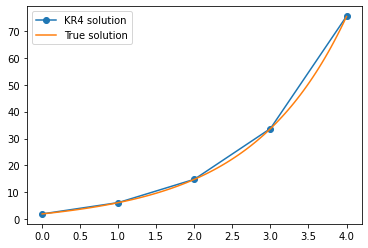

In [11]:
plt.plot(range(5),y,"-o",\
         np.linspace(0,4,100),y_t(np.linspace(0,4,100)),"-")
plt.legend(["KR4 solution","True solution"])
plt.show()

### Example / Homework
Solve for the velocity and position of the free-falling bungee jumper assuming at $t=0$, $x=0,\;v=0$ for $t\in[0,10]$ with a step size of 2 seconds.

**Equations**
$$v=\dydx{x}{t}\\
\dydx{v}{t} = g - \frac{c_d}{m}v^2$$

**Values:**
$g=9.81\unit{ m/s}^2$, $m=68.1 \unit{kg}$, $C_d = 0.25 \unit{kg/m}$

**Analytical solution:** $$x(t)=\frac{\ln\left(\cosh{\sqrt{\frac{gC_d}{m}}t}\right)}{C_d/m}$$

[Source: WolframAlpha](https://www.wolframalpha.com/input?i=y%27%27%28t%29+-+a+%2Bb*y%27%28t%29**2+%3D+0%2C+y%280%29%3D0%2Cy%27%280%29%3D0)

In [12]:
g = 9.81 # m/s^2
m = 68.1 # kg
C_d = 0.25 # kg/m

def f(t,xp):
    return g - C_d/m*xp**2

## Euler

In [13]:
t = np.arange(0,10,2)
#t = np.linspace(0,10,500)
h = t[1]-t[0]
x  = np.array([0])
xp = np.array([0])

for ti in t[:-1]:
    xp_ip1 = xp[-1] + f(ti,xp[-1])*h
    x_ip1  = x[-1]  + xp_ip1*h
    xp = np.append(xp,xp_ip1)
    x = np.append(x,x_ip1)

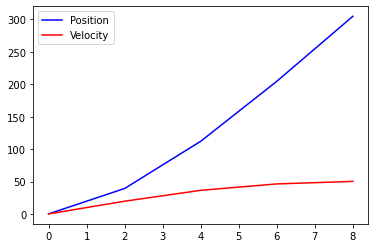

In [14]:
plt.plot(t,x,"-b",t,xp,"-r")
plt.legend(("Position","Velocity"))
plt.show()

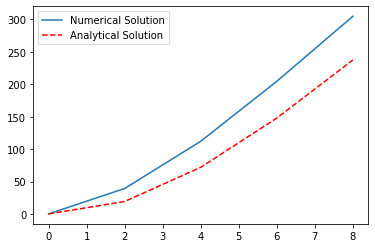

In [15]:
def x_a(t):
    # Analytical Solution
    return np.log(np.cosh(np.sqrt(g*C_d/m)*t))/(C_d/m)

plt.plot(t,x,"-",t,x_a(t),"--r")
plt.legend(["Numerical Solution","Analytical Solution"])
plt.show()

## RK4

In [16]:
t = np.arange(0,10,2)
#t = np.linspace(0,10,500)
h = t[1]-t[0]
x_RK4  = np.array([0])
xp_RK4 = np.array([0])

for ti in t[:-1]:
    k1 = f(ti,xp[-1])
    k2 = f(ti+0.5*h,xp_RK4[-1]+0.5*k1*h)
    k3 = f(ti+0.5*h,xp_RK4[-1]+0.5*k2*h)
    k4 = f(ti+0.5*h,xp_RK4[-1]+k3*h)
    xp_ip1 = xp_RK4[-1] + (k1+2*k2+2*k3+k4)*h/6
    
    x_ip1  = x_RK4[-1]  + xp_ip1*h
    
    xp_RK4 = np.append(xp_RK4,xp_ip1)
    x_RK4 = np.append(x_RK4,x_ip1)

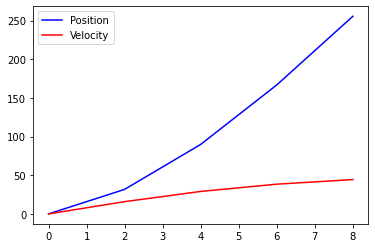

In [17]:
plt.plot(t,x_RK4,"-b",t,xp_RK4,"-r")
plt.legend(("Position","Velocity"))
plt.show()

## Comparison of Euler & RK4

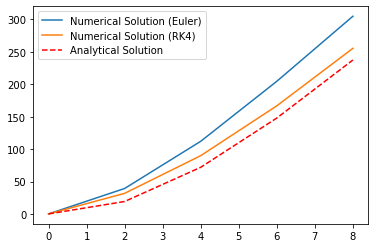

In [18]:
plt.plot(t,x,"-",t,x_RK4,"-",t,x_a(t),"--r")
plt.legend(["Numerical Solution (Euler)",
            "Numerical Solution (RK4)",
            "Analytical Solution"])
plt.show()

# Example: 1st order ODE via Euler
$$y' = y, y(0) = 1$$

In [19]:
def f(t,y):
    return y

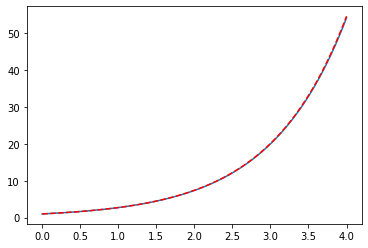

In [20]:
t = np.linspace(0,4,1000)
h = t[1] - t[0]
y = np.array([1])

for tt in t[:-1]:
    y_ip1 = y[-1] + f(tt,y[-1]) * h
    #print(y_ip1)
    y = np.append(y,y_ip1)

plt.plot(t,y,"-",t,np.exp(t),"--r")
plt.show()

# Example: 2nd order ODE via Euler $y''=f(y)$
$$y'' = y, y(0) = 1, y'(0) = 1$$

In [21]:
def f(x,y,yp):
    # y'' = f(x,y,yp)
    return y

In [22]:
x = np.linspace(0,4,100)
h = x[1] - x[0]

y = np.array([1])
yp = np.array([1])

for xx in x[:-1]:
    yp_ip1 = yp[-1] + f(x[-1],y[-1],yp[-1]) *h
    yp = np.append(yp,yp_ip1)
    y_ip1 = y[-1] + yp_ip1 * h
    y = np.append(y,y_ip1)

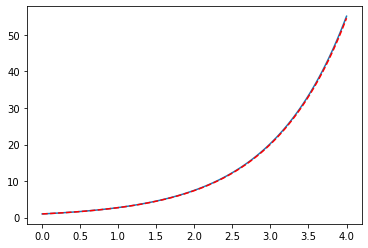

In [23]:
plt.plot(x,y,"-",x,np.exp(x),"--r")
plt.show()

# Example: 2nd Order ODE via Euler $y'' = f(y,y')$
$$y'' + y' -6y, y(0) = 8, y'(0)=-9$$

**Analytical Solution:** $y(x) = 3e^{2x} + 5e^{-3x}$

In [24]:
def f(x,y,yp):
    # y'' = f(x,y,yp)
    return 6*y - yp

In [25]:
x = np.linspace(0,4,1000)
h = x[1] - x[0]

y = np.array([8])
yp = np.array([-9])

for xx in x[:-1]:
    yp_ip1 = yp[-1] + f(x[-1],y[-1],yp[-1]) *h
    yp = np.append(yp,yp_ip1)
    y_ip1 = y[-1] + yp_ip1 * h
    y = np.append(y,y_ip1)

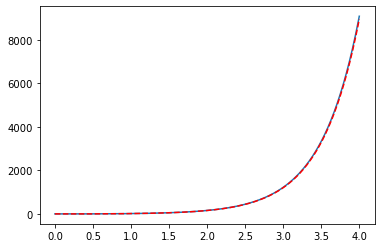

In [26]:
plt.plot(x,y,"-",x,3*np.exp(2*x)+5*np.exp(-3*x),"--r")
plt.show()

# Example: 2nd Order ODE
[Gilberto E. Urroz](https://en.smath.com/wiki/GetFile.aspx?File=Examples/RK4-2ndOrderODE.pdf)

$$y''+y.y'+3y = \sin(x), y(0) = -1, y'(0) = 1, x\in[0,20]$$

## Euler

In [27]:
def f(x,y,yp):
    # y'' = f(x,y,yp)
    return np.sin(x)-3.*y-y*yp

In [28]:
x = np.linspace(0,20,350)
h = x[1] - x[0]

y = np.array([-1])
yp = np.array([1])

for i in range(x.size-1):
    yp_ip1 = yp[-1] + f(x[i],y[-1],yp[-1]) *h
    yp = np.append(yp,yp_ip1)
    y_ip1 = y[-1] + yp_ip1 * h
    y = np.append(y,y_ip1)

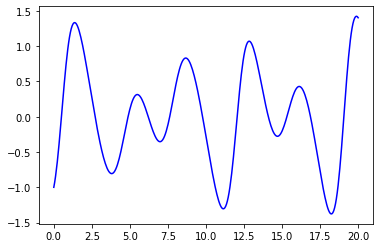

In [29]:
plt.plot(x,y,"-b")
plt.show()

## RK4

In [30]:
x = np.linspace(0,20,350)
h = x[1] - x[0]

y = np.array([-1])
yp = np.array([1])

for i in range(x.size-1):
    k1 = f(x[i],y[-1],yp[-1])
    k2 = f(x[i]+0.5*h,y[-1],yp[-1]+0.5*k1*h)
    k3 = f(x[i]+0.5*h,y[-1],yp[-1]+0.5*k2*h)
    k4 = f(x[i]+h,y[-1],yp[-1]+k3*h)
    yp_ip1 = yp[-1]+(k1+2*k2+2*k3+k4)*h/6
    yp = np.append(yp,yp_ip1)

    y_ip1 = y[-1] + yp_ip1 * h
    y = np.append(y,y_ip1)

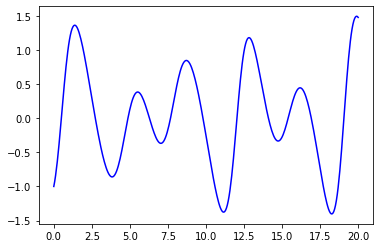

In [31]:
plt.plot(x,y,"-b")
#plt.plot(x,yp,"-r")
plt.show()

# References
* Chapra
* Eda Çelik Akdur, KMU231 Lecture Notes